<img src="https://upload.wikimedia.org/wikipedia/commons/2/2e/Game_of_Thrones_2011_logo.svg" width="500" align="left">

## Battles Data Set

### Configuraition Settings

In [18]:
# Enable pycharm interactive mode for display of charts
mp.interactive(False)

# Configure data frame display output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 1000)

### Opening and Converting a csv File to a Data Frame

#### Import Libraries

1. Import libraries needed for code (the mp.style.use line is a custom style config for later):

In [6]:
import pandas as pd
import matplotlib.pyplot as mp
import urllib2
mp.style.use('fivethirtyeight')

#### Create Data Frame Code

1. Create a variable for the csv file -> csv_file_01
2. Create a variable for the data frame. We can reuse this as necessary.
3. Run data.head() to get the first few rows of our data frame.

In [29]:
csv_file_01 = pd.io.parser'https://github.com/spencermcghin/python/blob/master/data_sets/game-of-thrones/battles.csv'
data = pd.DataFrame(pd.read_csv(csv_file_01))
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'https://github.com/spencermcghin/python/blob/master/data_sets/game-of-thrones/battles.csv'

### Create New Data Frame for Houses and Respective Battles and Troop Sizes

In [16]:
time_battles = data[['year', 'name', 'attacker_1', 'attacker_size']].fillna(0)
time_set_filter = time_battles[time_battles['attacker_1'] == 'Lannister']
lannister_battles_table = time_set_filter.groupby(['year', 'name']).sum()
house_battles_table = time_battles.groupby(['year', 'attacker_1', 'name']).sum()
print(house_battles_table.head())  # remove .head() if you want to see the whole data frame
print(lannister_battles_table)

                                             attacker_size
year attacker_1 name                                      
298  Lannister  Battle at the Mummer's Ford            0.0
                Battle of Riverrun                 15000.0
                Battle of the Golden Tooth         15000.0
                Sack of Darry                          0.0
     Stark      Battle of the Camps                 6000.0
                                  attacker_size
year name                                      
298  Battle at the Mummer's Ford            0.0
     Battle of Riverrun                 15000.0
     Battle of the Golden Tooth         15000.0
     Sack of Darry                          0.0
299  Battle of the Fords                20000.0
     Battle of the Ruby Ford                0.0
     Retaking of Harrenhal                  0.0
300  Siege of Riverrun                   3000.0


### Battles by House Visualization

                             total_battles
attacker_1                                
Baratheon                                5
Bolton                                   2
Bracken                                  1
Brave Companions                         1
Brotherhood without Banners              1
Darry                                    1
Free folk                                1
Frey                                     2
Greyjoy                                  7
Lannister                                8
Stark                                    8


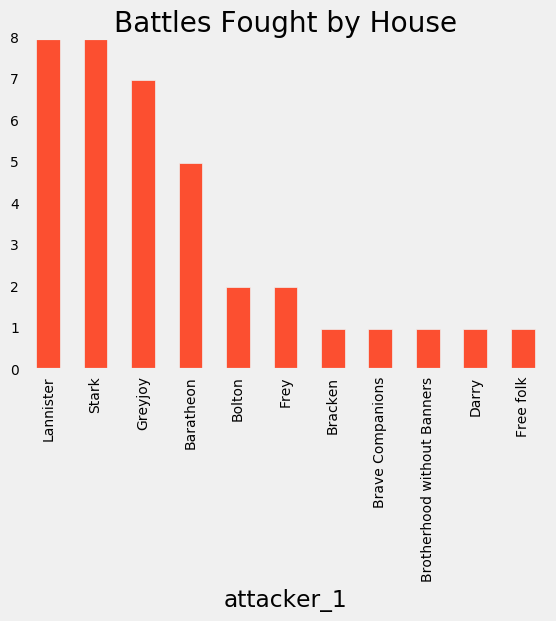

In [8]:
house_battles = data[['attacker_1', 'attacker_outcome']].groupby(['attacker_1']).count()
house_battles.columns = ['total_battles']
print(house_battles)  # show preview of new data frame
house_battles.sort_values(by='total_battles', ascending=False)\
    .plot(kind='bar', color=['#FC4F30'], grid=False, legend=None, fontsize=10, title='Battles Fought by House')
mp.show()

### Battles Won by House

                             battles_won
attacker_1                              
Baratheon                              4
Bolton                                 2
Bracken                                1
Brave Companions                       1
Brotherhood without Banners            1
Darry                                  1
Frey                                   2
Greyjoy                                7
Lannister                              7
Stark                                  6


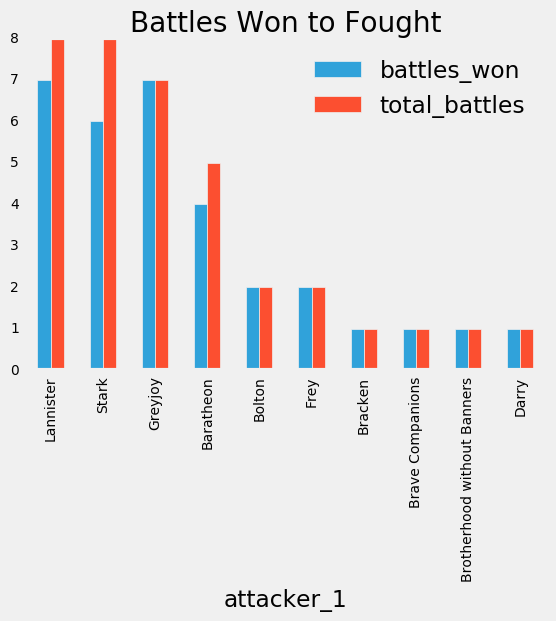

In [9]:
# Battles Won by House
wins = data[['attacker_1', 'attacker_outcome']]
house_wins = wins[wins['attacker_outcome'] == 'win'].groupby(['attacker_1']).count()
house_wins.columns = ['battles_won']
print(house_wins)  # show preview of new data frame

# Join Battles Won and Total Battles Data Frames. Plot this new data frame.
win_percent = (house_wins.battles_won/house_battles.total_battles) * 100
win_percent.columns = ['% Battles Won']
wins_table = house_wins.join(house_battles)
wins_table.sort_values(by='total_battles', ascending=False)\
    .plot(kind='bar', fontsize=10, grid=False, title='Battles Won to Fought')
mp.show()

## Character Death Data Set

### Opening and Converting a csv File to a Data Frame

This is the same operation as above, but for a new data set with some custom columns.

In [ ]:
# Create character death data frame object with which to work
csv_file_02 = open('/Users/SMcGhin/Documents/python/data_sets/game-of-thrones/character-deaths.csv', 'rt')
death_data = pd.DataFrame(pd.read_csv(csv_file_02))
death_data['Allegiances'] = death_data['Allegiances'].str.replace('House ', '')  # Remove 'House' prefix to group values
print(death_data.head())

### Data frame for character deaths by house

In [23]:
# Count character deaths by allegiance
fil_char_deaths_01 = death_data[death_data['Allegiances'] != 'None']  # Filter out unwanted alignments
fil_char_deaths_02 = fil_char_deaths_01[fil_char_deaths_01['Allegiances'] != 'Wildling']  # Filter out unwanted alignments
fil_char_deaths_03 = fil_char_deaths_02[fil_char_deaths_02['Allegiances'] != "Night's Watch"]  #  Filter out unwanted alignments
char_deaths = fil_char_deaths_03[['Name', 'Allegiances']].groupby(['Allegiances']).count()
char_deaths.columns = ['total_deaths']
print(char_deaths)

             total_deaths
Allegiances              
Arryn                  30
Baratheon              64
Greyjoy                75
Lannister             102
Martell                37
Stark                 108
Targaryen              36
Tully                  30
Tyrell                 26


### Bar Chart for Character Deaths by House

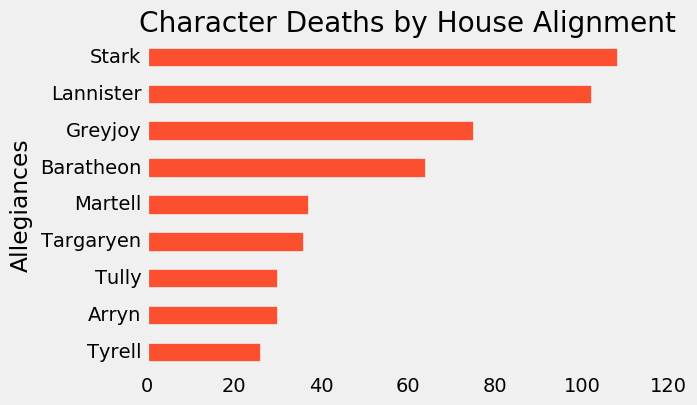

In [25]:
# Basic bar showing deaths by house
char_deaths.sort_values(by='total_deaths')\
     .plot(kind='barh', grid=False, color=['#FC4F30'], legend=None, title='Character Deaths by House Alignment')
mp.show()

### Bar Chart for Nobility Deaths per Total House Deaths

             noble_deaths  total_deaths
Allegiances                            
Arryn                  20            30
Baratheon              47            64
Greyjoy                37            75
Lannister              66           102
Martell                25            37
Stark                  69           108
Targaryen              10            36
Tully                  21            30
Tyrell                 21            26


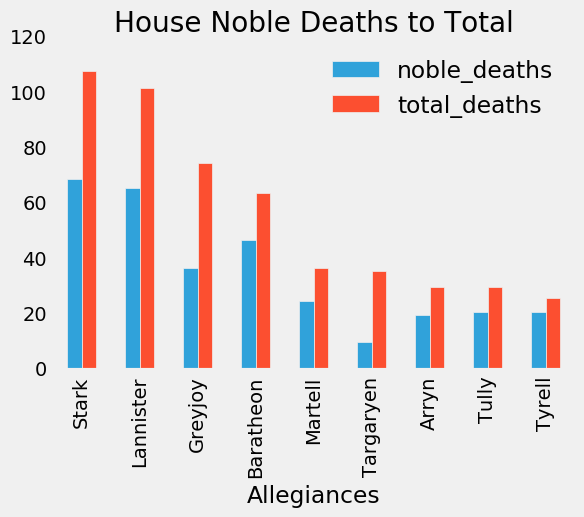

In [26]:
# Plot number of noble deaths per total deaths by house
noble_deaths_filter = fil_char_deaths_03[fil_char_deaths_03['Nobility'] == 1]  # Build noble death column
noble_table = noble_deaths_filter[['Name', 'Allegiances']].groupby(['Allegiances']).count()
noble_table.columns = ['noble_deaths']
noble_death_table = noble_table.join(char_deaths)  # Join to existing table to plot
print(noble_death_table)
noble_death_table.sort_values(by='total_deaths', ascending=False)\
     .plot(kind='bar', grid=False, title='House Noble Deaths to Total')
mp.show()

## Donut Chart for % to Total Deaths in Series

In [27]:
# Get % of Deaths to Total Deaths data frame
death_perc = (char_deaths/char_deaths.sum()) * 100
death_perc.columns = ['perc_tot_deaths']
print(death_perc)

             perc_tot_deaths
Allegiances                 
Arryn               5.905512
Baratheon          12.598425
Greyjoy            14.763780
Lannister          20.078740
Martell             7.283465
Stark              21.259843
Targaryen           7.086614
Tully               5.905512
Tyrell              5.118110


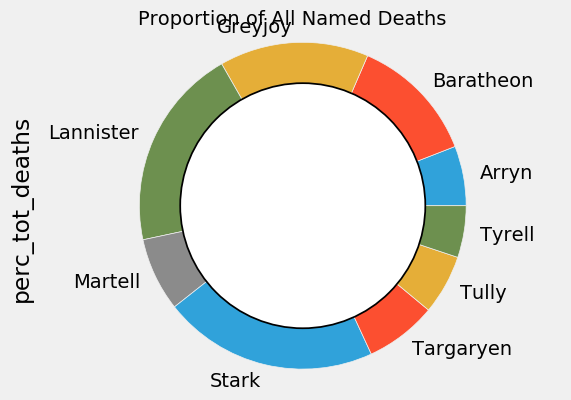

In [28]:
# Donut Chart for % of Death Total
death_perc.plot(kind='pie', subplots=True, legend=False, title='Proportion of All Named Deaths')
center_circle = mp.Circle((0, 0), 0.75, color='black', fc='white', linewidth=1.25)  # Draw circle in center
fig = mp.gcf()
fig.gca().add_artist(center_circle)
mp.axis('equal')  # Set aspect ratio to be equal so drawn as circle
mp.show()